In [ ]:
#데이터 생성
x = list(range(10))
y = [1,1,2,4,5,7,8,9,9,10]


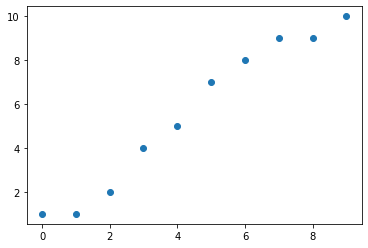

In [ ]:
#데이터 표현
import matplotlib.pyplot as plt

plt.scatter(x,y)

In [ ]:
#가설 설정
class H():

  def __init__(self,w):
    self.w = w
  def forward(self,x):
    return self.w * x  

#평균제곱 오차를 사용한 비용함수 정의
def cost(h,x,y):
  error = 0 
  for i in range(len(x)):
    error += (h.forward(x[i]) - y[i])**2
  error = error / len(x)  
  return error

h = H(4)
cost(h,x,y)

222.2

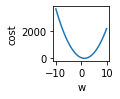

In [ ]:
list_w = []
list_c = []

#가중치에 따른 오류값 구하기
for i in range(-100,100):
  w = i * 0.1
  h = H(w)
  c = cost(h,x,y)
  list_w.append(w)
  list_c.append(c)

#가중치에 따른 오류값 그래프로 나타내기
plt.figure(figsize=(1,1))
plt.xlabel('w')
plt.ylabel('cost')
plt.plot(list_w,list_c)

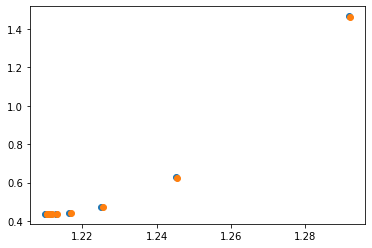

In [ ]:
#수치해석적으로 구한 경사도
def cal_grad(w,cost):
  h = H(w)
  cost1 = cost(h,x,y)
  eps = 0.001
  h = H(w+eps)
  cost2 = cost(h,x,y)
  dcost = cost2 - cost1
  dw = eps
  grad = dcost / dw
  return grad, (cost1+cost2)*0.5

#수학적 편미분으로 구한 경사도
def cal_grad2(w,cost):
  h = H(w)
  grad = 0
  for i in range(len(x)):
    grad += 2 * (h.forward(x[i]) - y[i]) * x[i]
  grad =  grad / len(x)
  c = cost(h, x, y)

  return grad, c

w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

#수치해석적으로 구한 w 경사도,오류값과 수학적 방법으로 구한 w 경사도,오류값 비교
for i in range(10):
  grad, mean_cost = cal_grad(w1,cost)
  grad2, mean_cost2 = cal_grad2(w2,cost)
  w1 -= lr * grad
  w2 -= lr * grad2

  list_w1.append(w1)
  list_w2.append(w2)
  list_c1.append(mean_cost)
  list_c2.append(mean_cost2)

plt.scatter(list_w1,list_c1)
plt.scatter(list_w2,list_c2)